### 測試標註資料

c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\ic100-2\textdet_imgs\train\3_0.jpg
3_0.jpg
     0    1     2    3     4    5    6    7         8
0  480  630  1000  630  1000  750  480  750  G2PWlW07
1  802  408  1290  408  1290  526  802  526   5WCBCTD
2  826  278  1294  278  1294  392  826  392   K4A8G16
3  872  142  1294  142  1294  262  872  262    SEC 49
Index(['0', '1', '2', '3', '4', '5', '6', '7', 'txt'], dtype='object')
802


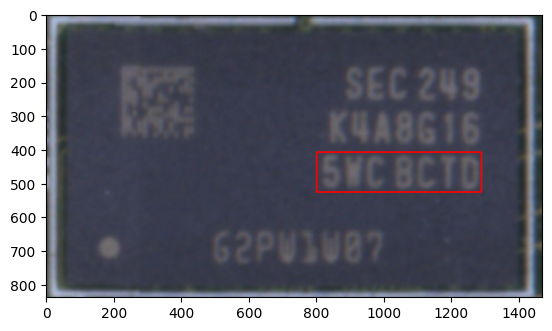

[[ 802  408]
 [1290  408]
 [1290  526]
 [ 802  526]]


SystemExit: 

c:\Users\User\anaconda3\envs\mmocr\lib\site-packages\IPython\core\interactiveshell.py:3558: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [46]:
import os
import cv2
from PIL import Image
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt

path = os.getcwd()
path = os.path.join(path, "by慶偉")
path = os.path.join(path, "ic100-2")
annoabs = os.path.join(path, "annotations")
imgabs = os.path.join(path, "textdet_imgs")

data_type = ["train", "test"]
for datatype in data_type:
    annopath = os.path.join(annoabs, datatype)
    imgpath = os.path.join(imgabs, datatype)
    filelist = [filename for filename in os.listdir(imgpath) if filename.find(".jpg") != -1]

    for filename in filelist:
        
        # txtfilename = filename.replace(".jpg", ".txt")
        imgfilename = "3_0.jpg"
        txtfilename = imgfilename.replace(".jpg", ".txt")

        print(os.path.join(imgpath, imgfilename))
        img = Image.open(os.path.join(imgpath, imgfilename))
        img = np.array(img)

        det_df = pd.read_csv(os.path.join(annopath, f"gt_{txtfilename}"), header=None)
        print(imgfilename)
        print(det_df)

        det_df.columns = ["0", "1", "2", "3", "4", "5", "6", "7", "txt"]
        print(det_df.columns)
        print(det_df["0"].iloc[1])
        pts = [[det_df["0"].iloc[1], det_df["1"].iloc[1]],
               [det_df["2"].iloc[1], det_df["3"].iloc[1]],
               [det_df["4"].iloc[1], det_df["5"].iloc[1]],
               [det_df["6"].iloc[1], det_df["7"].iloc[1]]]
        pts = np.array(pts, np.int32)

        cv2.polylines(img, [pts], isClosed=True, color=(255, 0, 0), thickness=3)

        plt.imshow(img)
        plt.show()

        print(pts)

        sys.exit()

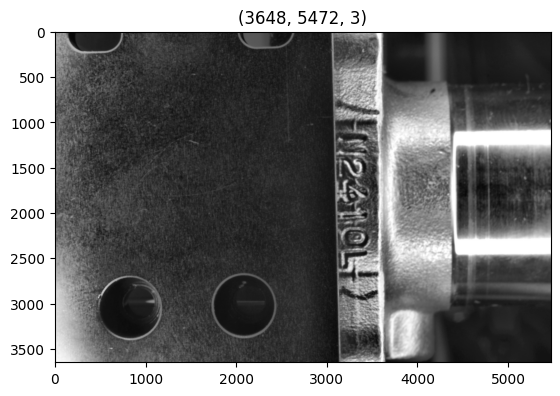

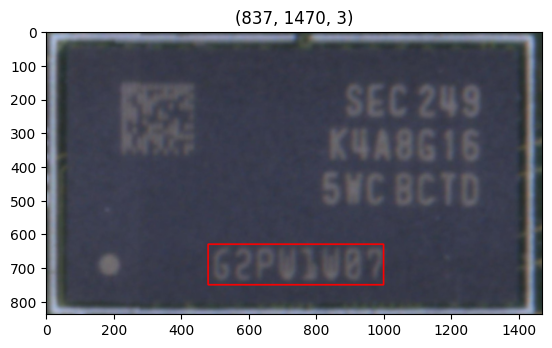

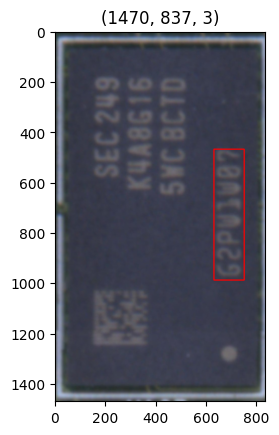

In [82]:
path = "./data/imgs/CLAHE/0.jpg"
img = cv2.imread(path)
plt.imshow(img)
plt.title(img.shape)
plt.show()



path2 = os.path.join(imgpath, imgfilename)
img2 = Image.open(path2)
img2 = np.array(img2)
points = np.array([[480, 630], [1000, 630], [1000, 750], [480, 750]], np.int32)
text = "G2PWlW07"

cv2.polylines(img2, [points], isClosed=True, color=(255, 0, 0), thickness=3)

plt.imshow(img2)
plt.title(img2.shape)
plt.show()

c_img2 = cv2.rotate(img2, cv2.ROTATE_90_COUNTERCLOCKWISE)

center = (img2.shape[1]//2, img2.shape[0]//2)
angle = 90
rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1)

rotated_pts = cv2.transform(np.array([points]), rotation_matrix).squeeze()
rotated_pts = np.round(rotated_pts).astype(int)

plt.imshow(c_img2)
plt.title(c_img2.shape)
plt.show()

### 資料增強 (翻轉)

In [1]:
from PIL import Image
import pandas as pd
import numpy as np
import os
import cv2


def rotate_imgs(srcimg, srcpts):
    # dstimg = cv2.rotate(srcimg, cv2.ROTATE_90_COUNTERCLOCKWISE)

    center = (srcimg.shape[1]//2, srcimg.shape[0]//2)
    angle = 90
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1)

    rotated_pts = cv2.transform(np.array([srcpts]), rotation_matrix).squeeze()
    rotated_pts = np.round(rotated_pts).astype(int)

    ptsdf = pd.DataFrame(rotated_pts, columns=['X', 'Y'])

    # # 打印原始DataFrame
    # print("Original DataFrame:")
    # print(ptsdf)

    # 将DataFrame放置在第一行
    # print(ptsdf.values.flatten())
    return ptsdf.values.flatten()

path = os.getcwd()
path = os.path.join(path, "by慶偉")
path = os.path.join(path, "dataset")

dataType = ["imgs", "annotations"]


for anglestr in [0,90,180]:
    filenameList = [filename for filename in os.listdir(os.path.join(path, dataType[0]))
                    if filename.find(f"_{str(anglestr)}.")!=-1]
    # print(filenameList)
    for imgname in filenameList:
        img = Image.open(os.path.join(os.path.join(path, dataType[0]), imgname))
        img = np.array(img)

        txtname = "gt_"+imgname.replace(".jpg", ".txt")
        df = pd.read_csv(os.path.join(os.path.join(path, dataType[1]), txtname), header=None)
        df.columns = ["0","1","2","3","4","5","6","7","label"]
        # print(df)
        # print(len(df))
        newdf = df
        for rdx in range(len(df)):
            
            aa = df.iloc[rdx][:-1].to_numpy()
            pts = np.array([
                [aa[0],aa[1]],
                [aa[2],aa[3]],
                [aa[4],aa[5]],
                [aa[6],aa[7]]
                ])

            label = df.iloc[rdx][-1]
            # print(pts)
            
            newpts = rotate_imgs(img, pts)
            # print(newpts)

            newdf.iloc[rdx, :-1] = newpts
        # print(newdf)

        dstimg = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
        dstimgname = imgname.replace(f"_{str(anglestr)}.jpg", f"_{str(anglestr+90)}.jpg")
        dsttxtname = txtname.replace(f"_{str(anglestr)}.txt", f"_{str(anglestr+90)}.txt")

        print(os.path.join(os.path.join(path, dataType[0]), dstimgname))
        print(os.path.join(os.path.join(path, dataType[1]), dsttxtname))
        
        # plt.subplot(1,2,1)
        # plt.title(f"{imgname} : {img.shape}")
        # plt.imshow(img)
        # plt.subplot(1,2,2)
        # plt.imshow(dstimg)
        # plt.title(f"{dstimgname} : {dstimg.shape}")
        # plt.show()
        

        dstimgpath = os.path.join(os.path.join(path, dataType[0]), dstimgname)
        # os.remove(dstimgpath)

        # 将 BGR 格式的图像转换为 RGB 格式
        # img_rgb = cv2.cvtColor(dstimg, cv2.COLOR_BGR2RGB)

        # 创建 PIL 图像对象
        pil_img = Image.fromarray(dstimg)

        # 保存图像
        pil_img.save(dstimgpath)
        # cv2.imwrite(dstimgpath, dstimg)
        

        newdf.to_csv(os.path.join(os.path.join(path, dataType[1]), dsttxtname),
                    header=None, index=False)
        # sys.exit()




C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Loc

c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\100_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_100_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\101_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_101_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\102_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_102_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\103_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_103_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\104_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_104_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\105_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_105_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\10_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_10_90.txt
c:\Users

C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Loc

c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\20_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_20_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\21_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_21_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\22_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_22_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\23_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_23_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\24_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_24_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\25_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_25_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\26_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_26_90.txt
c:\Users\User\Deskto

C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Loc

c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\35_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_35_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\36_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_36_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\37_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_37_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\38_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_38_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\39_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_39_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\3_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_3_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\40_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_40_90.txt
c:\Users\User\Desktop\

C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Loc

c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\50_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_50_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\51_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_51_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\52_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_52_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\53_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_53_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\54_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_54_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\55_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_55_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\56_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_56_90.txt
c:\Users\User\Deskto

C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Loc

c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\67_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_67_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\68_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_68_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\69_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_69_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\6_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_6_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\70_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_70_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\71_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_71_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\72_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_72_90.txt
c:\Users\User\Desktop\

C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Loc

c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\82_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_82_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\83_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_83_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\84_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_84_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\85_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_85_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\86_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_86_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\87_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_87_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\88_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_88_90.txt
c:\Users\User\Deskto

C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Loc

c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\99_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_99_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\9_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_9_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1000_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1000_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1001_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1001_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1002_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1002_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1003_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1003_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1004_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\d

C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Loc

c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1013_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1013_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1014_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1014_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1015_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1015_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1016_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1016_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1017_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1017_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1018_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1018_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1019_90.jpg
c:\Users\User\Des

C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Loc

c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1031_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1031_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1032_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1032_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1033_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1033_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1034_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1034_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1035_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1035_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1036_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1036_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1037_90.jpg
c:\Users\User\Des

C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Loc

c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1048_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1048_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1049_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1049_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1050_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1050_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1051_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1051_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1052_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1052_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1053_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1053_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1054_90.jpg
c:\Users\User\Des

C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Loc

c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1066_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1066_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1067_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1067_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1068_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1068_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1069_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1069_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1070_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1070_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1071_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1071_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1072_90.jpg
c:\Users\User\Des

C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Loc

c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1085_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1085_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1086_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1086_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1087_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1087_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1088_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1088_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1089_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1089_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1090_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1090_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1091_90.jpg
c:\Users\User\Des

C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Loc

c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1103_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1103_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1104_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1104_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1105_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1105_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1106_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1106_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1107_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1107_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1108_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1108_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1109_90.jpg
c:\Users\User\Des

C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Loc

c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1125_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1125_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1126_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1126_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1127_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1127_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1128_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1128_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1129_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1129_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1130_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1130_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1131_90.jpg
c:\Users\User\Des

C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Loc

c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1148_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1148_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1149_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1149_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1150_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1150_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1151_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1151_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1152_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1152_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1153_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1153_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1154_90.jpg
c:\Users\User\Des

C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Loc

c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1172_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1172_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1173_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1173_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1174_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1174_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1175_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1175_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1176_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1176_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1177_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1177_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1178_90.jpg
c:\Users\User\Des

C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Loc

c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1196_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1196_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1197_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1197_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1198_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1198_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1199_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1199_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1200_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1200_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1201_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1201_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1202_90.jpg
c:\Users\User\Des

C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Loc

c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1219_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1219_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1220_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1220_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1221_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1221_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1222_90.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1222_90.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\100_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_100_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\101_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_101_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\102_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\

C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Loc

c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\17_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_17_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\18_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_18_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\19_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_19_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\1_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_1_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\20_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_20_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\21_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_21_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\22_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_22_180.txt
c:\Users

C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Loc

c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\44_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_44_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\45_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_45_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\46_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_46_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\47_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_47_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\48_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_48_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\49_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_49_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\4_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_4_180.txt
c:\Users

C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Loc

c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\61_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_61_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\62_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_62_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\63_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_63_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\64_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_64_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\65_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_65_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\66_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_66_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\67_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_67_180.txt
c:\Use

C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Loc

c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\78_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_78_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\79_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_79_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\7_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_7_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\80_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_80_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\81_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_81_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\82_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_82_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\83_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_83_180.txt
c:\Users

C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Loc

c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\94_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_94_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\95_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_95_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\96_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_96_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\97_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_97_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\98_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_98_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\99_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_99_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\9_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_9_180.txt
c:\Users

C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Loc

c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1010_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1010_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1011_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1011_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1012_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1012_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1013_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1013_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1014_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1014_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1015_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1015_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1016_180.jpg
c:\U

C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Loc

c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1028_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1028_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1029_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1029_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1030_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1030_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1031_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1031_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1032_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1032_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1033_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1033_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1034_180.jpg
c:\U

C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Loc

c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1047_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1047_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1048_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1048_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1049_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1049_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1050_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1050_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1051_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1051_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1052_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1052_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1053_180.jpg
c:\U

C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Loc

c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1066_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1066_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1067_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1067_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1068_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1068_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1069_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1069_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1070_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1070_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1071_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1071_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1072_180.jpg
c:\U

C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Loc

c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1084_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1084_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1085_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1085_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1086_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1086_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1087_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1087_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1088_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1088_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1089_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1089_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1090_180.jpg
c:\U

C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Loc

c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1104_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1104_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1105_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1105_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1106_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1106_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1107_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1107_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1108_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1108_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1109_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1109_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1110_180.jpg
c:\U

C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Loc

c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1127_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1127_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1128_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1128_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1129_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1129_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1130_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1130_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1131_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1131_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1132_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1132_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1133_180.jpg
c:\U

C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Loc

c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1150_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1150_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1151_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1151_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1152_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1152_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1153_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1153_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1154_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1154_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1155_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1155_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1156_180.jpg
c:\U

C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Loc

c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1173_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1173_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1174_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1174_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1175_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1175_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1176_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1176_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1177_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1177_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1178_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1178_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1179_180.jpg
c:\U

C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Loc

c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1197_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1197_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1198_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1198_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1199_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1199_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1200_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1200_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1201_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1201_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1202_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1202_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1203_180.jpg
c:\U

C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Loc

c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1219_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1219_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1220_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1220_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1221_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1221_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1222_180.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1222_180.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\100_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_100_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\101_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_101_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\102_270.jpg
c:\Users\User\Desktop\C_VSCod

C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Loc

c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\17_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_17_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\18_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_18_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\19_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_19_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\1_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_1_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\20_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_20_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\21_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_21_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\22_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_22_270.txt
c:\Users

C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Loc

c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\2_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_2_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\30_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_30_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\31_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_31_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\32_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_32_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\33_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_33_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\34_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_34_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\35_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_35_270.txt
c:\Users

C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Loc

c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\45_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_45_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\46_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_46_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\47_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_47_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\48_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_48_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\49_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_49_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\4_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_4_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\50_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_50_270.txt
c:\Users

C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Loc

c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\61_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_61_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\62_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_62_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\63_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_63_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\64_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_64_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\65_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_65_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\66_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_66_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\67_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_67_270.txt
c:\Use

C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Loc

c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\79_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_79_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\7_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_7_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\80_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_80_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\81_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_81_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\82_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_82_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\83_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_83_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\84_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_84_270.txt
c:\Users

C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Loc

c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\96_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_96_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\97_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_97_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\98_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_98_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\99_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_99_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\9_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_9_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1000_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1000_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1001_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_i

C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Loc

c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1009_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1009_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1010_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1010_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1011_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1011_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1012_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1012_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1013_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1013_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1014_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1014_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1015_270.jpg
c:\U

C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Loc

c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1027_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1027_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1028_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1028_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1029_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1029_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1030_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1030_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1031_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1031_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1032_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1032_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1033_270.jpg
c:\U

C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Loc

c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1045_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1045_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1046_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1046_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1047_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1047_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1048_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1048_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1049_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1049_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1050_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1050_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1051_270.jpg
c:\U

C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Loc

c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1063_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1063_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1064_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1064_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1065_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1065_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1066_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1066_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1067_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1067_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1068_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1068_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1069_270.jpg
c:\U

C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Loc

c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1102_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1102_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1103_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1103_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1104_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1104_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1105_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1105_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1106_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1106_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1107_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1107_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1108_270.jpg
c:\U

C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Loc

c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1126_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1126_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1127_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1127_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1128_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1128_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1129_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1129_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1130_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1130_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1131_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1131_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1132_270.jpg
c:\U

C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Loc

c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1147_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1147_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1148_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1148_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1149_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1149_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1150_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1150_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1151_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1151_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1152_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1152_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1153_270.jpg
c:\U

C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Loc

c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1169_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1169_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1170_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1170_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1171_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1171_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1172_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1172_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1173_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1173_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1174_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1174_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1175_270.jpg
c:\U

C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Loc

c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1191_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1191_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1192_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1192_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1193_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1193_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1194_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1194_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1195_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1195_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1196_270.jpg
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\annotations\gt_img_1196_270.txt
c:\Users\User\Desktop\C_VSCode\mmocr\by慶偉\dataset\imgs\img_1197_270.jpg
c:\U

C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Local\Temp\ipykernel_3212\1114338826.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df.iloc[rdx][-1]
C:\Users\User\AppData\Loc

### data split (train/test/val)

In [2]:
import os
import pandas as pd
from PIL import Image
import numpy as np
import cv2
import shutil

path = os.getcwd()
path = os.path.join(path, "by慶偉")
srcpath = os.path.join(path, "dataset")
srcimgpath = os.path.join(srcpath, "imgs")
srctxtpath = os.path.join(srcpath, "annotations")

dstpath = os.path.join(path, "ic100-2")

imgfiles = [f"{file}" 
            for file in os.listdir(srcimgpath)]
txtfiles = [f"{file}"
            for file in os.listdir(srctxtpath)]
print(len(imgfiles))
print(len(txtfiles))
df = pd.DataFrame({"imgs":imgfiles, 
                   "annotations":txtfiles})
test_df = df.sample(frac=0.2)
df = df.drop(test_df.index)
df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)


try:
    for file in os.listdir(os.path.join(dstpath, f"textdet_imgs/train/")):
        os.remove(os.path.join(dstpath, f"textdet_imgs/train/{file}"))
except:
    pass
try:
    for file in os.listdir(os.path.join(dstpath, f"textdet_imgs/test/")):
        os.remove(os.path.join(dstpath, f"textdet_imgs/test/{file}"))
except:
    pass
try:
    for file in os.listdir(os.path.join(dstpath, f"annotations/train/")):
        os.remove(os.path.join(dstpath, f"annotations/train/{file}"))
except:
    pass
try:
    for file in os.listdir(os.path.join(dstpath, f"annotations/test/")):
        os.remove(os.path.join(dstpath, f"annotations/test/{file}"))
except:
    pass


for idx in range(len(df)):

    

    src = os.path.join(srcimgpath, df["imgs"].iloc[idx])
    dst = os.path.join(dstpath, f"textdet_imgs/train/{df['imgs'].iloc[idx]}")
    shutil.copyfile(src, dst)

    src2 = os.path.join(srctxtpath, df["annotations"].iloc[idx])
    dst2 = os.path.join(dstpath, f"annotations/train/{df['annotations'].iloc[idx]}")
    shutil.copyfile(src2, dst2)


for idx in range(len(test_df)):

    src = os.path.join(srcimgpath, test_df["imgs"].iloc[idx])
    dst = os.path.join(dstpath, f"textdet_imgs/test/{test_df['imgs'].iloc[idx]}")
    shutil.copyfile(src, dst)

    src2 = os.path.join(srctxtpath, df["annotations"].iloc[idx])
    dst2 = os.path.join(dstpath, f"annotations/test/{test_df['annotations'].iloc[idx]}")
    shutil.copyfile(src2, dst2)

df

1316
1316


,imgs,annotations
0,100_0.jpg,gt_100_0.txt
1,100_270.jpg,gt_100_270.txt
2,101_270.jpg,gt_101_270.txt
3,101_90.jpg,gt_101_90.txt
4,102_0.jpg,gt_102_0.txt
...,...,...
1048,img_1221_180.jpg,gt_img_1221_180.txt
1049,img_1221_270.jpg,gt_img_1221_270.txt
1050,img_1221_90.jpg,gt_img_1221_90.txt
1051,img_1222_270.jpg,gt_img_1222_270.txt


### training loss curve (from training log)

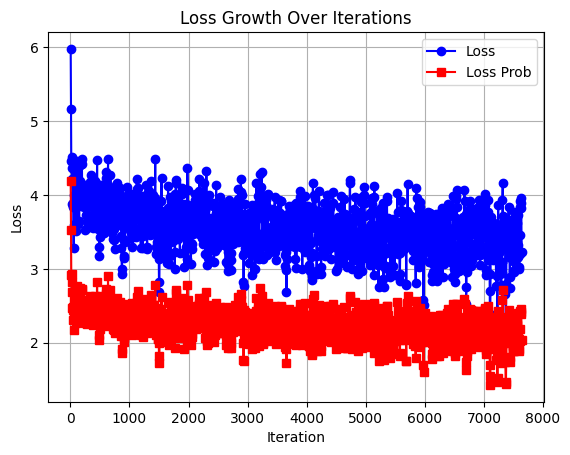

,lr,data_time,loss,loss_prob,loss_thr,loss_db,time,epoch,iter,memory,step
0,0.0070,1.633263,5.972218,4.190040,1.127800,0.654379,2.535684,1.0,5.0,4533.0,5.0
1,0.0070,0.817639,5.158938,3.520310,1.041236,0.597392,1.534728,1.0,10.0,4533.0,10.0
2,0.0070,0.002801,4.450625,2.915351,0.977552,0.557722,0.523134,1.0,15.0,4533.0,15.0
3,0.0070,0.003234,4.504555,2.930507,0.994618,0.579430,0.511589,1.0,20.0,4533.0,20.0
4,0.0070,0.003134,4.362283,2.820424,0.957690,0.584169,0.518103,1.0,25.0,4533.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...
1515,0.0069,0.004562,3.914737,2.428531,0.930718,0.555488,0.527165,20.0,7618.0,4533.0,7618.0
1516,0.0069,0.003864,3.828158,2.383108,0.905654,0.539396,0.524257,20.0,7623.0,4533.0,7623.0
1517,0.0069,0.006203,3.951201,2.453050,0.925488,0.572663,0.519544,20.0,7628.0,4533.0,7628.0
1518,0.0069,0.006952,3.883111,2.410109,0.916443,0.556559,0.533765,20.0,7633.0,4533.0,7633.0


In [5]:
import pandas as pd
import numpy as np
import os
import json
import ast
import matplotlib.pyplot as plt
from time import time, sleep


path = os.getcwd()
path = os.path.join(path, "mmocr")
path = os.path.join(path, "tools")
path = os.path.join(path, "data")
path = os.path.join(path, "ic100-2")
path = os.path.join(path, "20240315_121456")
path = os.path.join(path, "vis_data")
jsonfile = [file for file in os.listdir(path) if file.find(".json") != -1 and file.find("scalar") == -1][0]
js_path = os.path.join(path, jsonfile)

file = []
try:
    with open(js_path, 'r', encoding='utf-8') as f:
        content = f.read()
        # print(content)
        lines = content.strip().split('\n')


        dictionaries = []
        for line in lines:
            # print(line)
            line.replace("NaN", "0")
            try:
                # Use ast.literal_eval instead of eval for safer evaluation
                dictionary = ast.literal_eval(line)
                # Convert values to float, replacing '0' with 0
                dictionary = {k: float(v) if v != '0' else 0 for k, v in dictionary.items()}
                dictionaries.append(dictionary)
            except (SyntaxError, ValueError) as e:
                print(f"Error evaluating line: {line}\nError: {e}")

        # dictionaries = [eval(line) for line in lines]
        # print(dictionaries)

        # try:
        #     dictionary = eval(content)
        #     print(dictionary)
        # except Exception as e:
        #     print(f"Error: {e}")
        # js = json.loads(content)
        # file.append(js)
except json.JSONDecodeError as e:
    print(f"Error decoding JSON: {e}")
    # Handle the exception or exit the program if necessary

# Now, you can proceed with the normalization if js is defined successfully
df = pd.DataFrame(dictionaries)

# iterations = [entry["iter"] for entry in dictionaries]
iterations = (df["iter"].values[:])
# loss_values = [entry["loss"] for entry in dictionaries]
loss_values = df["loss"].values[:]
# loss_prob_values = [entry["loss_prob"] for entry in dictionaries]
loss_prob_values = df["loss_prob"].values[:]

# Plot the loss values against iterations
plt.plot(iterations, loss_values, marker='o', linestyle='-', color='b', label='Loss')
plt.plot(iterations, loss_prob_values, marker='s', linestyle='-', color='r', label='Loss Prob')

plt.title('Loss Growth Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.close()


df.to_csv("ic_training_log.csv", index=False)
df